# **Import Library**

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

In [47]:
df = pd.read_csv("data/dataset_traffic_accident_prediction1.csv")
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [48]:
df.drop(columns=["Accident_Severity"], inplace=True)

In [4]:
print("\nDataset Information :")
df.info()


Dataset Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Road_Condition        798 non-null    object 
 8   Vehicle_Type          798 non-null    object 
 9   Driver_Age            798 non-null    float64
 10  Driver_Experience     798 non-null    float64
 11  Road_Light_Condition  798 non-null    object 
 12  Accident              798 non-null    float64
dtypes: float64(7), object(6)
memory usage: 85.4+ KB


# **Check Missing Value on Data**

In [5]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64


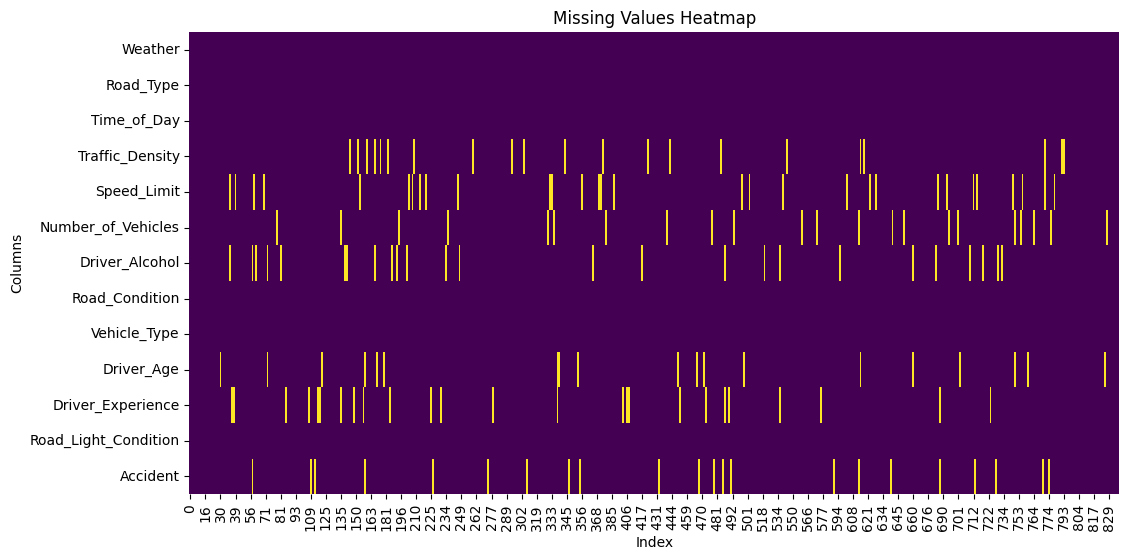

In [54]:
df_transposed = df.T

plt.figure(figsize=(12, 6))  
sns.heatmap(df_transposed.isnull(), cbar=False, cmap='viridis')  
plt.title("Missing Values Heatmap")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()

## **Fill in the blank data with the highest value**

In [55]:
for column in df.columns:
    most_frequent_value = df[column].mode()[0]  
    df[column] = df[column].fillna(most_frequent_value)

In [8]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Dry,Car,62.0,55.0,Artificial Light,1.0


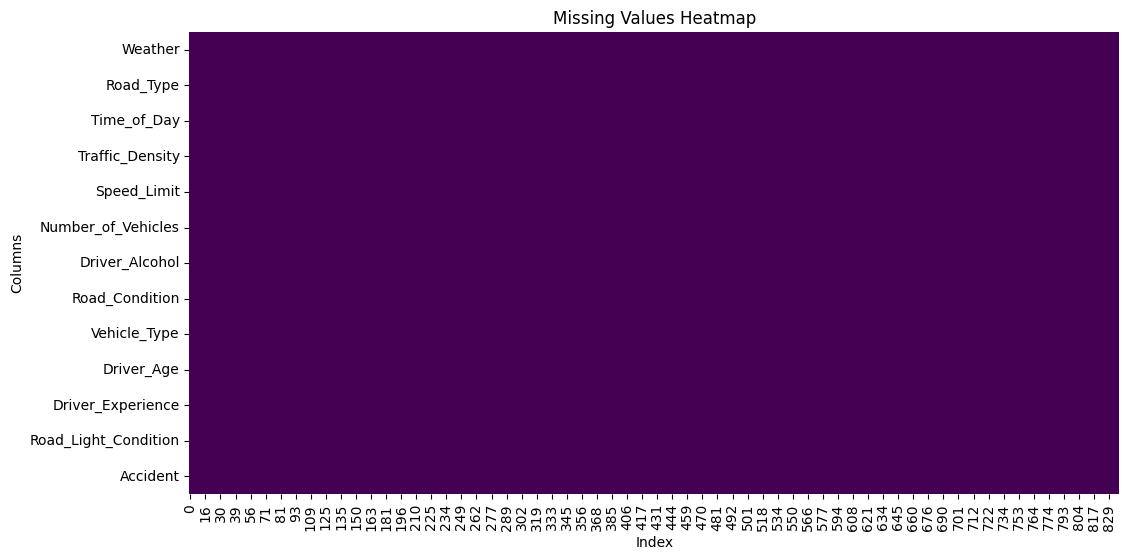

In [56]:
df_transposed = df.T

plt.figure(figsize=(12, 6))  
sns.heatmap(df_transposed.isnull(), cbar=False, cmap='viridis')  
plt.title("Missing Values Heatmap")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()

# **Exploratory Data Analysis (EDA)**

## *Distribution of Numeric Features*

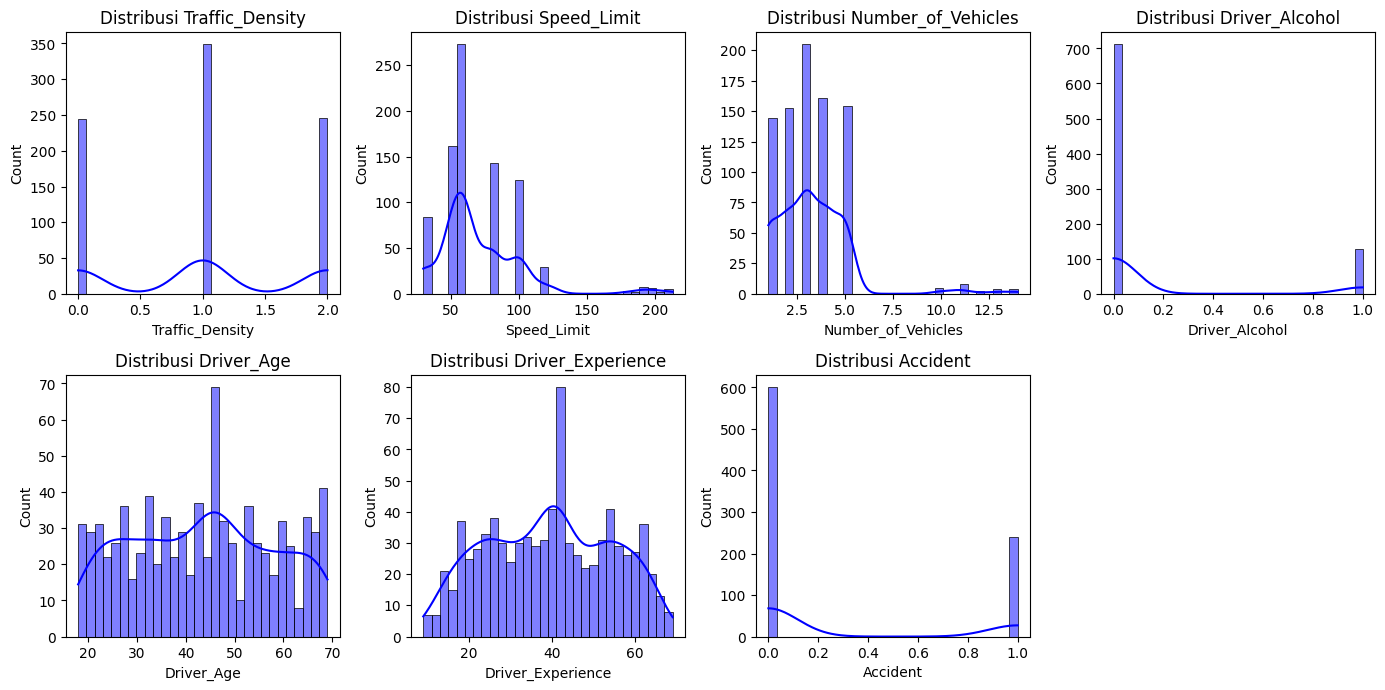

In [10]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

## *Distribution of Categoric Features*

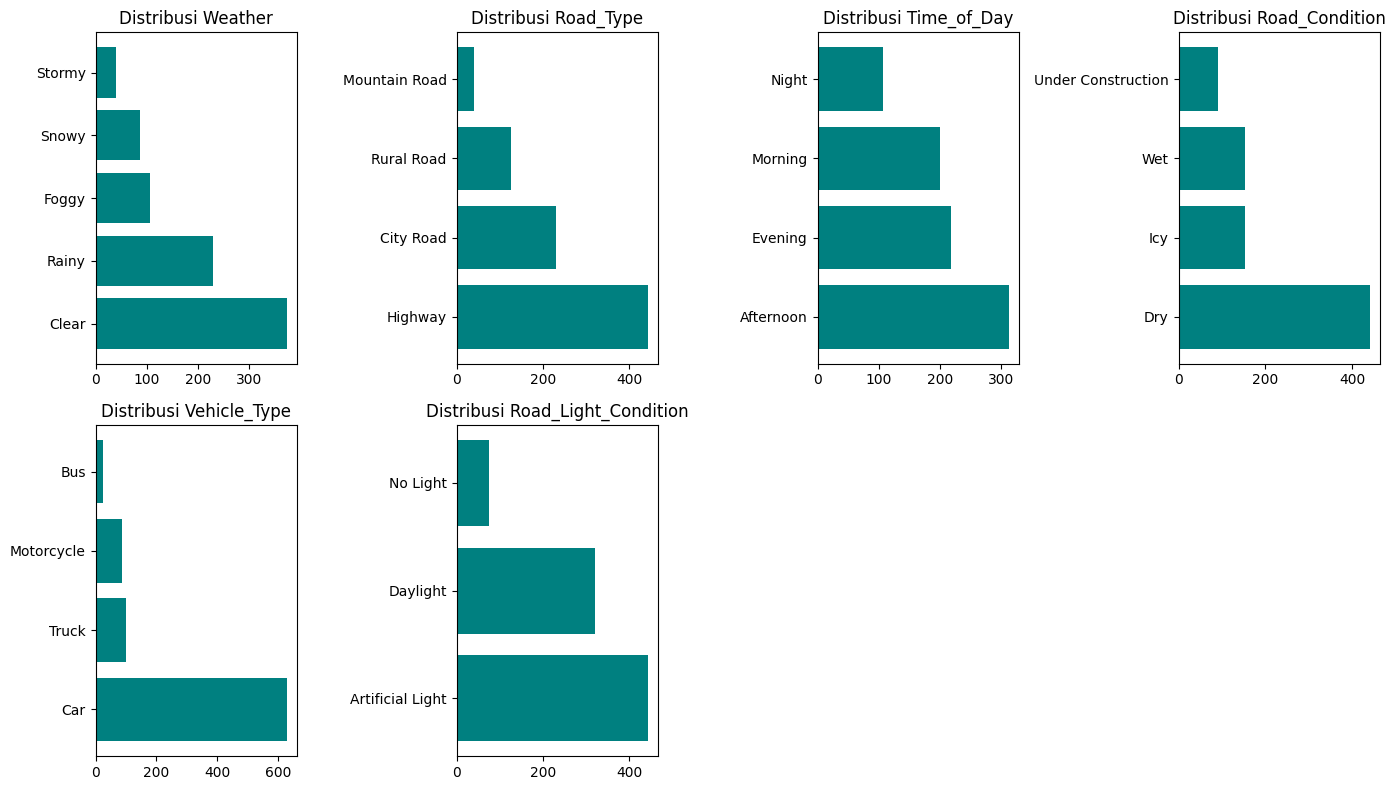

In [11]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    value_counts = df[column].value_counts()
    plt.barh(value_counts.index, value_counts.values, color='teal')  # Horizontal bar
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

## *Heatmap Correlation For Numeric Features*

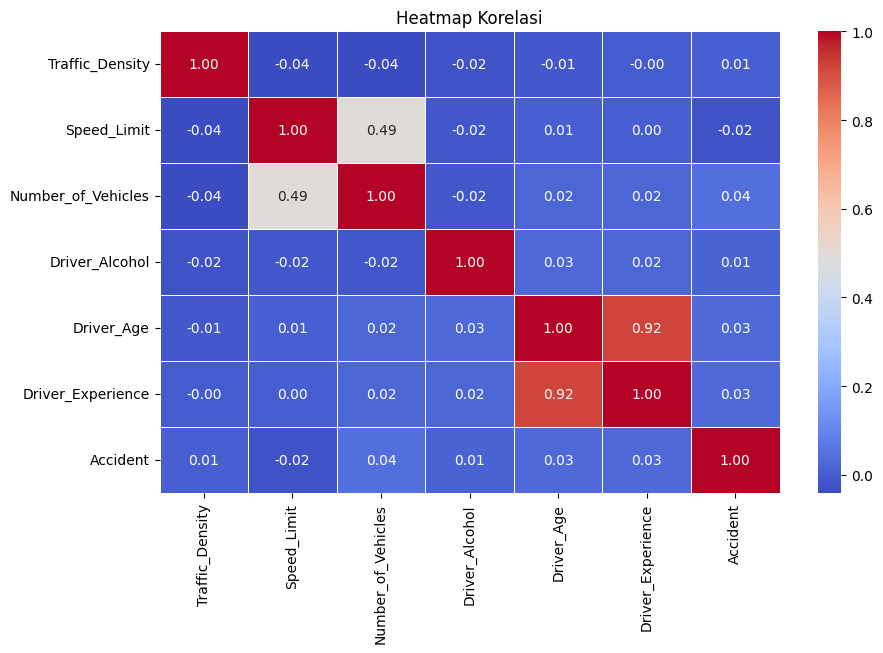

In [12]:
plt.figure(figsize=(10, 6))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## *Pair Plot For Numeric Features*

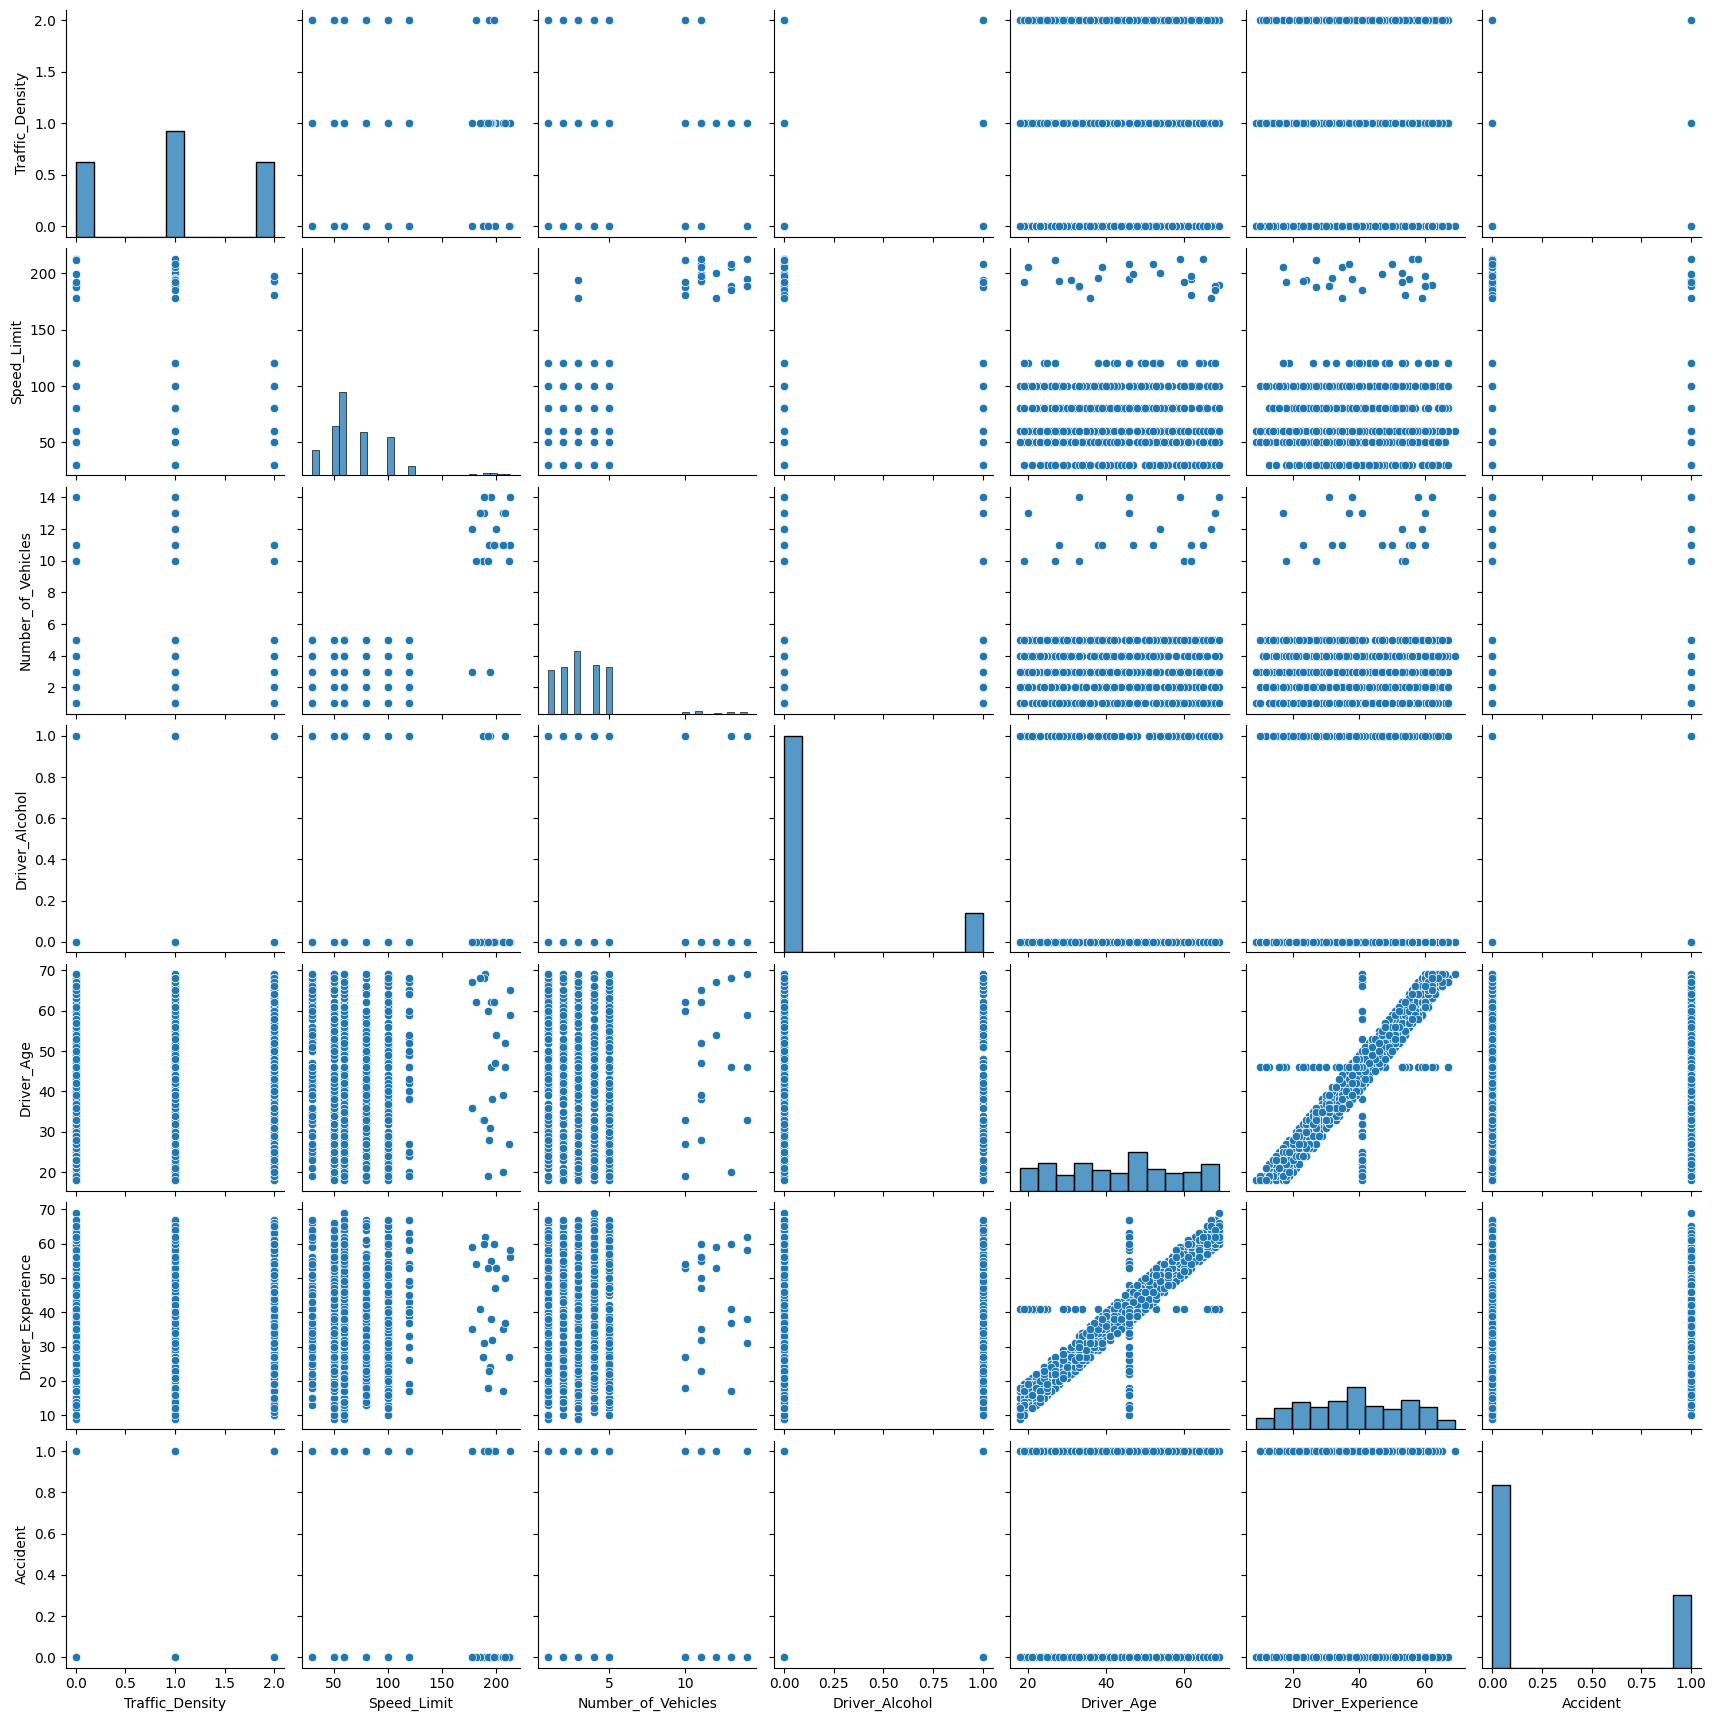

In [13]:
sns.pairplot(num_features)
plt.show()

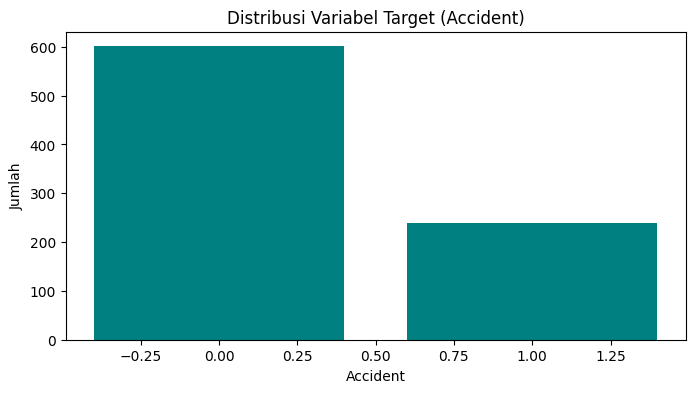

In [14]:
plt.figure(figsize=(8, 4))
value_counts = df['Accident'].value_counts()
plt.bar(value_counts.index, value_counts.values, color='teal')

plt.title('Distribusi Variabel Target (Accident)')
plt.xlabel('Accident')
plt.ylabel('Jumlah')
plt.show()

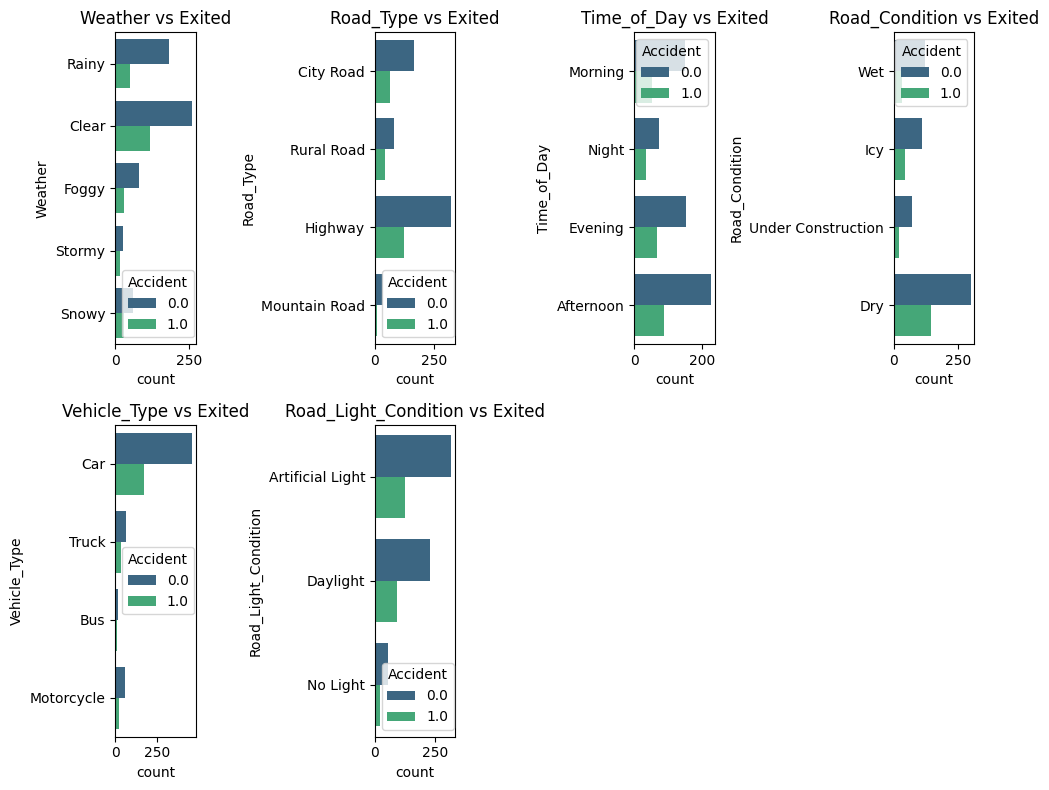

In [15]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(cat_features.columns, 1):
    if column != 'Accident':
        plt.subplot(2, 4, i)
        sns.countplot(y=column, hue='Accident', data=df, palette='viridis')
        plt.title(f'{column} vs Exited')

plt.tight_layout()
plt.show()

# **Dataset Splitting**

## *Before Use Encoding*

In [16]:
X = df.drop(columns="Accident")
y = df["Accident"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((672, 12), (168, 12), (672,), (168,))

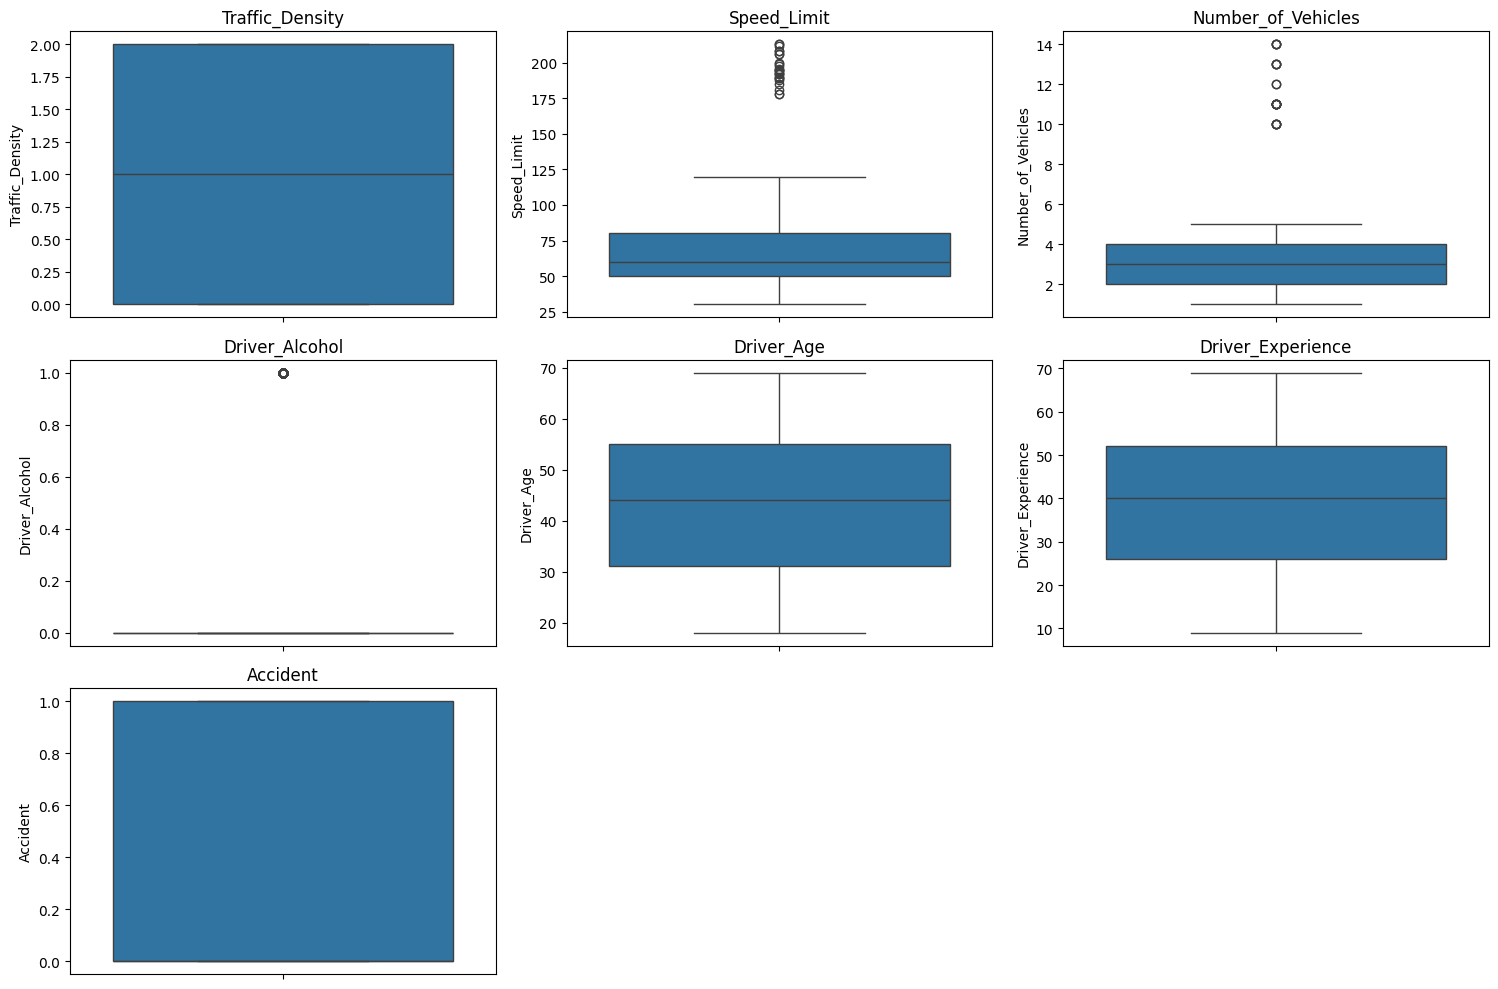

In [17]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))  
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i) 
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Preprocessing

In [18]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Driver_Age', 
                                             'Driver_Experience']),
    ('categoric', cat_pipe(encoder="onehot"), ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 
                                               'Road_Light_Condition']),
])

### **Use RandomForest**

#### *RandomizedSearchCV*

In [19]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_rsp = RandomizedSearchCV(pipeline, rsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_rsp.fit(X_train, y_train)

print(model_rf_rsp.best_params_)
print(model_rf_rsp.score(X_train, y_train), model_rf_rsp.best_score_, model_rf_rsp.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 64, 'algo__max_features': 0.7045226052462121, 'algo__min_samples_leaf': 11, 'algo__n_estimators': 165}
0.7410714285714286 0.7187728026533997 0.7083333333333334


In [22]:
y_val_pred_rf_rsp = model_rf_rsp.predict(X_val)
report = classification_report(y_val, y_val_pred_rf_rsp)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_val, y_val_pred_rf_rsp)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision_score(y_val, y_val_pred_rf_rsp, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rf_rsp ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_rf_rsp , zero_division=0):.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83       120
         1.0       0.00      0.00      0.00        48

    accuracy                           0.71       168
   macro avg       0.36      0.50      0.41       168
weighted avg       0.51      0.71      0.59       168


Confusion Matrix:
[[119   1]
 [ 48   0]]
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


==== Random Forest Classifier ====
Confusion Matrix:
[[120   0]
 [ 48   0]]
True Positive (TP): 0
False Positive (FP): 0
False Negative (FN): 48
True Negative (TN): 120
Accuracy: 0.7143
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

----------------------------------------



c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


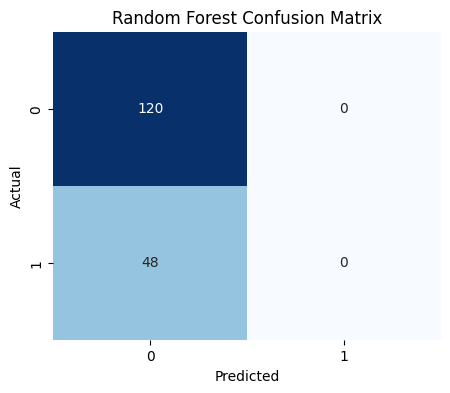

In [138]:
y_pred_rf_rsp = model_rf_rsp.predict(X_val)
cm_rf_rsp = confusion_matrix(y_val, y_pred_rf_rsp)
tn, fp, fn, tp = cm_rf_rsp.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf_rsp)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf_rsp):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_rf_rsp):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rf_rsp):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_rf_rsp):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### *GridSearchCV*

In [126]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_gsp = GridSearchCV(pipeline, gsp.rf_params, cv=5, n_jobs=-1, verbose=1)
model_rf_gsp.fit(X_train, y_train)

print(model_rf_gsp.best_params_)
print(model_rf_gsp.score(X_train, y_train), model_rf_gsp.best_score_, model_rf_gsp.score(X_val, y_val))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'algo__max_depth': 50, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 10, 'algo__n_estimators': 200}
0.7559523809523809 0.718750690989497 0.7142857142857143


In [133]:
y_val_pred_rf_gsp = model_rf_gsp.predict(X_val)
report = classification_report(y_val, y_val_pred_rf_gsp)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_val, y_val_pred_rf_gsp)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision_score(y_val, y_pred_rf_gsp, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rf_gsp):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_rf_gsp, zero_division=0):.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       120
         1.0       0.00      0.00      0.00        48

    accuracy                           0.71       168
   macro avg       0.36      0.50      0.42       168
weighted avg       0.51      0.71      0.60       168


Confusion Matrix:
[[120   0]
 [ 48   0]]
Precision: 1.0000
Recall: 0.0208
F1-Score: 0.0408


c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

==== Random Forest Classifier ====
Confusion Matrix:
[[120   0]
 [ 47   1]]
True Positive (TP): 1
False Positive (FP): 0
False Negative (FN): 47
True Negative (TN): 120
Accuracy: 0.7202
Precision: 1.0000
Recall: 0.0208
F1-Score: 0.0408

----------------------------------------



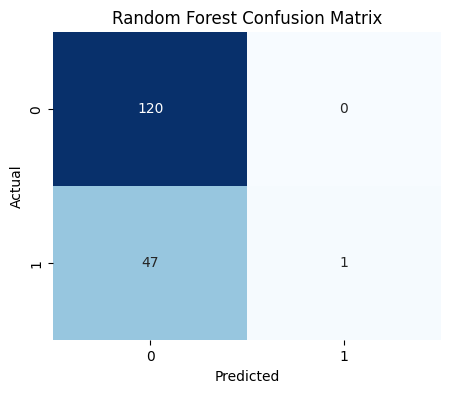

In [134]:
y_pred_rf_gsp = model_rf_gsp.predict(X_test)
cm_rf_gsp = confusion_matrix(y_test, y_pred_rf_gsp)
tn, fp, fn, tp = cm_rf_gsp.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf_gsp)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf_gsp):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_rf_gsp):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rf_gsp):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_rf_gsp):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf_gsp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### *Bayesian Optimizer*

In [139]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_bsp = BayesSearchCV(pipeline, bsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_bsp.fit(X_train, y_train)

print(model_rf_bsp.best_params_)
print(model_rf_bsp.score(X_train, y_train), model_rf_bsp.best_score_, model_rf_bsp.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [140]:
y_val_pred_rf_bsp = model_rf_gsp.predict(X_val)
report = classification_report(y_val, y_val_pred_rf_bsp)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_val, y_val_pred_rf_bsp)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision_score(y_val, y_pred_rf_gsp, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rf_gsp):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_rf_gsp, zero_division=0):.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       120
         1.0       0.00      0.00      0.00        48

    accuracy                           0.71       168
   macro avg       0.36      0.50      0.42       168
weighted avg       0.51      0.71      0.60       168


Confusion Matrix:
[[120   0]
 [ 48   0]]
Precision: 1.0000
Recall: 0.0208
F1-Score: 0.0408


c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

==== Random Forest Classifier ====
Confusion Matrix:
[[118   2]
 [ 46   2]]
True Positive (TP): 2
False Positive (FP): 2
False Negative (FN): 46
True Negative (TN): 118
Accuracy: 0.7143
Precision: 0.5000
Recall: 0.0417
F1-Score: 0.0769

----------------------------------------



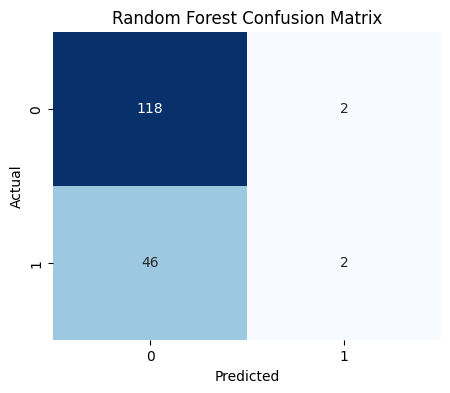

In [141]:
y_pred_rf_bsp = model_rf_bsp.predict(X_test)
cm_rf_bsp = confusion_matrix(y_test, y_pred_rf_bsp)
tn, fp, fn, tp = cm_rf_bsp.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf_bsp)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf_bsp):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_rf_bsp):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rf_bsp):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_rf_bsp):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf_bsp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## *After Use Encoding*

### **Use Label Encoding**

In [49]:
df.select_dtypes(include=["object"]).columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type',
       'Road_Light_Condition'],
      dtype='object')

In [57]:
label_encoder = LabelEncoder()

categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,2,0,2,1.0,100.0,5.0,0.0,3,1,51.0,48.0,0,0.0
2,2,1,1,1.0,60.0,4.0,0.0,1,1,54.0,52.0,0,0.0
3,0,0,0,2.0,60.0,3.0,0.0,2,0,34.0,31.0,1,0.0
6,1,1,0,0.0,60.0,4.0,0.0,0,3,27.0,26.0,1,1.0
7,2,0,0,0.0,60.0,4.0,0.0,0,1,29.0,22.0,0,1.0


In [58]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df.loc[condition, df.columns]

In [59]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,2,0,2,1.0,100.0,5.0,0.0,3,1,51.0,48.0,0,0.0
2,2,1,1,1.0,60.0,4.0,0.0,1,1,54.0,52.0,0,0.0
7,2,0,0,0.0,60.0,4.0,0.0,0,1,29.0,22.0,0,1.0
8,4,1,2,1.0,60.0,2.0,0.0,1,1,38.0,29.0,0,0.0
16,2,0,4,0.0,60.0,5.0,0.0,3,1,48.0,41.0,1,0.0


In [38]:
print(df.isnull().sum())

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


In [60]:
X = df.drop('Accident', axis=1)  
y = df['Accident'] 

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((428, 12), (108, 12), (428,), (108,))

In [63]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), X_train.columns),
    
])

#### **Randomized SearchCV**

In [70]:
rsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [84]:
param_grid = {
    'algo__n_estimators': [100, 200],
    'algo__min_samples_split': [10, 20],  
    'algo__min_samples_leaf': [5, 10],  
    'algo__max_features': ['log2', 'sqrt'],
    'algo__max_depth': [5, 8],  
    'algo__bootstrap': [True, False]
}

In [85]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_rsp_le = RandomizedSearchCV(pipeline, param_grid, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_rsp_le.fit(X_train, y_train)

print(model_rf_rsp_le.best_params_)
print(model_rf_rsp_le.score(X_train, y_train), model_rf_rsp_le.best_score_, model_rf_rsp_le.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__n_estimators': 100, 'algo__min_samples_split': 10, 'algo__min_samples_leaf': 5, 'algo__max_features': 'log2', 'algo__max_depth': 8, 'algo__bootstrap': True}
0.8948598130841121 0.7407113543091655 0.7685185185185185


In [65]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_rsp_le = RandomizedSearchCV(pipeline, rsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_rsp_le.fit(X_train, y_train)

print(model_rf_rsp_le.best_params_)
print(model_rf_rsp_le.score(X_train, y_train), model_rf_rsp_le.best_score_, model_rf_rsp_le.score(X_val, y_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 54, 'algo__max_features': 0.903064538936726, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 195}
0.9976635514018691 0.7616963064295486 0.7962962962962963


In [86]:
y_val_pred_rf_rsp_with_LE = model_rf_rsp_le.predict(X_val)
report = classification_report(y_val, y_val_pred_rf_rsp_with_LE)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_val, y_val_pred_rf_rsp_with_LE)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision_score(y_val, y_val_pred_rf_rsp_with_LE, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rf_rsp_with_LE ):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_rf_rsp_with_LE , zero_division=0):.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        54
         1.0       0.77      0.76      0.77        54

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108


Confusion Matrix:
[[42 12]
 [13 41]]
Precision: 0.7736
Recall: 0.7593
F1-Score: 0.7664


#### **Grid SearchCV**

In [67]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_gsp_le = GridSearchCV(pipeline, gsp.rf_params, cv=5, n_jobs=-1, verbose=1)
model_rf_gsp_le.fit(X_train, y_train)

print(model_rf_gsp_le.best_params_)
print(model_rf_gsp_le.score(X_train, y_train), model_rf_gsp_le.best_score_, model_rf_gsp_le.score(X_val, y_val))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'algo__max_depth': 50, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}
1.0 0.7734610123119016 0.8148148148148148


In [68]:
y_val_pred_rf_gsp_with_LE = model_rf_gsp_le.predict(X_val)
report = classification_report(y_val, y_val_pred_rf_gsp_with_LE)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_val, y_val_pred_rf_gsp_with_LE)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision_score(y_val, y_val_pred_rf_gsp_with_LE, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rf_gsp_with_LE):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_rf_gsp_with_LE , zero_division=0):.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        54
         1.0       0.81      0.81      0.81        54

    accuracy                           0.81       108
   macro avg       0.81      0.81      0.81       108
weighted avg       0.81      0.81      0.81       108


Confusion Matrix:
[[44 10]
 [10 44]]
Precision: 0.8148
Recall: 0.8148
F1-Score: 0.8148


#### **Bayesian Optimizer**

In [88]:
bsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200, prior='uniform', transform='normalize'),
 'algo__max_depth': Integer(low=20, high=80, prior='uniform', transform='normalize'),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform', transform='normalize'),
 'algo__min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize')}

In [107]:
param_space = {
    'algo__n_estimators': Integer(50, 80),  # Menurunkan jumlah estimator
    'algo__max_depth': Integer(3, 7),  # Batasi kedalaman pohon
    'algo__min_samples_split': Integer(10, 20),  # Minimum sampel untuk split
    'algo__min_samples_leaf': Integer(5, 10),  # Minimum sampel untuk daun
    'algo__max_features': Real(0.2, 0.5),  # Coba nilai yang lebih rendah
    'algo__bootstrap': [True, False]  # Coba dengan bootstrapping
}

In [110]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_bsp_le = BayesSearchCV(pipeline, param_space, n_iter = 50, cv=10, n_jobs=-1, verbose=3)
model_rf_bsp_le.fit(X_train, y_train)

print(model_rf_bsp_le.best_params_)
print(model_rf_bsp_le.score(X_train, y_train), model_rf_bsp_le.best_score_, model_rf_bsp_le.score(X_val, y_val))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [69]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_bsp_le = BayesSearchCV(pipeline, bsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_bsp_le.fit(X_train, y_train)

print(model_rf_bsp_le.best_params_)
print(model_rf_bsp_le.score(X_train, y_train), model_rf_bsp_le.best_score_, model_rf_bsp_le.score(X_val, y_val))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [71]:
y_val_pred_rf_bsp_with_LE = model_rf_bsp_le.predict(X_val)
report = classification_report(y_val, y_val_pred_rf_bsp_with_LE)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_val, y_val_pred_rf_bsp_with_LE)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision_score(y_val, y_val_pred_rf_bsp_with_LE, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rf_bsp_with_LE):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_rf_bsp_with_LE , zero_division=0):.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81        54
         1.0       0.82      0.78      0.80        54

    accuracy                           0.81       108
   macro avg       0.81      0.81      0.81       108
weighted avg       0.81      0.81      0.81       108


Confusion Matrix:
[[45  9]
 [12 42]]
Precision: 0.8235
Recall: 0.7778
F1-Score: 0.8000
